In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv('all_train.csv')


In [52]:

signal = df.iloc[1177,4:-1]

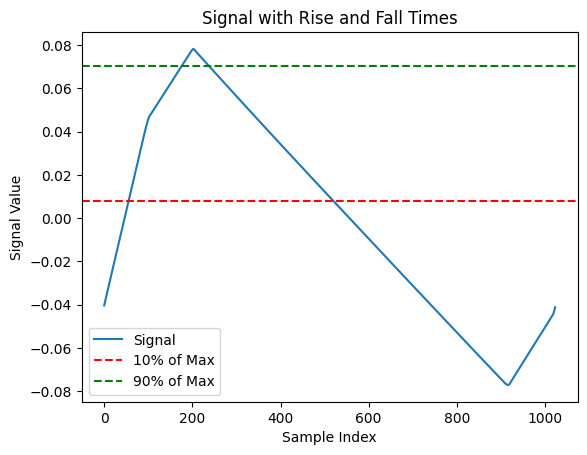

上升时间: 56 个样本
下降时间: -36 个样本


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


signal = signal3
t = np.arange(len(signal))
# 找到最大值及其位置
max_value = np.max(signal)
max_index = np.argmax(signal)

# 定义阈值（例如最大值的10%和90%）
threshold_up = max_value * 0.1
threshold_down = max_value * 0.9

# 计算上升时间
rise_start_index = np.where(signal >= threshold_up)[0][0]
rise_time = t[rise_start_index] - t[0]  # 假设起始时间为t[0]

# 计算下降时间
fall_start_index = np.where(signal[max_index:] <= threshold_down)[0][0] + max_index
fall_time = t[max_index] - t[fall_start_index]

# 绘图
plt.plot(t, signal, label='Signal')
plt.axhline(threshold_up, color='r', linestyle='--', label='10% of Max')
plt.axhline(threshold_down, color='g', linestyle='--', label='90% of Max')
plt.legend()
plt.title('Signal with Rise and Fall Times')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.show()

print(f"上升时间: {rise_time} 个样本")
print(f"下降时间: {fall_time} 个样本")

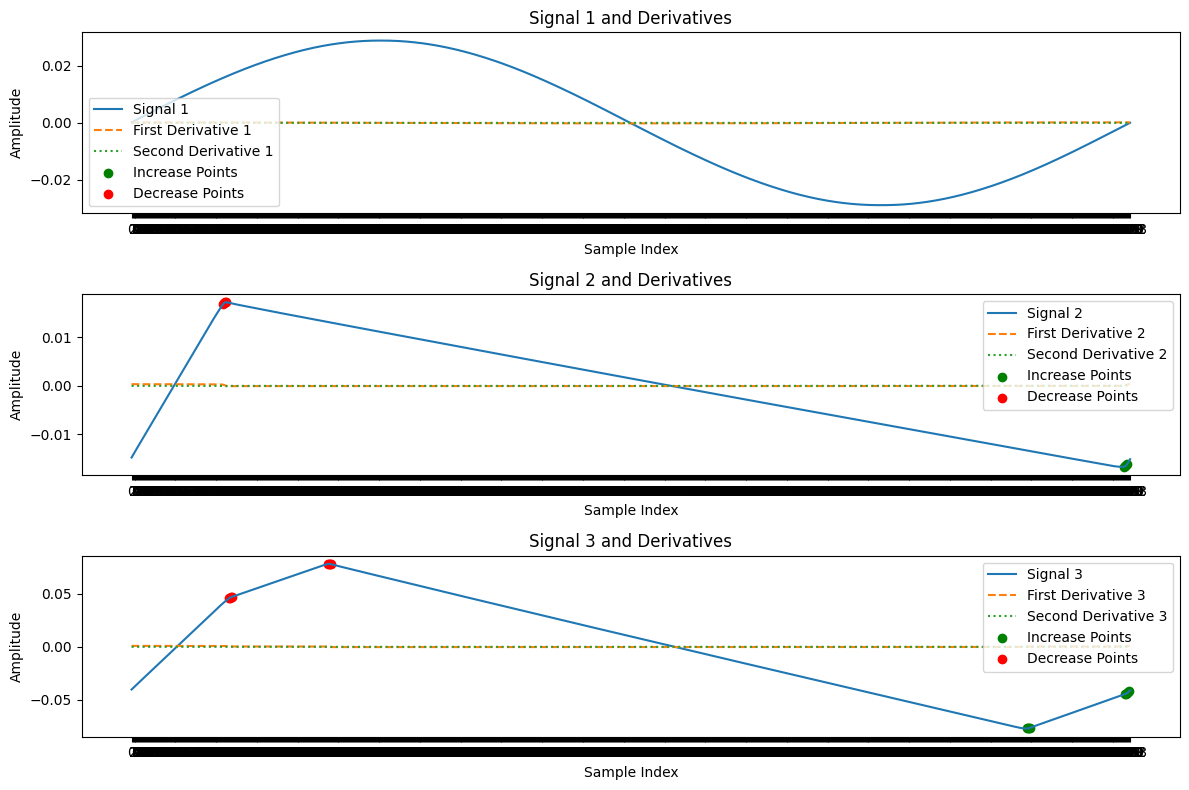

斜率突变的点个数: Signal 1 - 0, Signal 2 - 8, Signal 3 - 17
增的突变点个数: Signal 1 - 0, Signal 2 - 4, Signal 3 - 9
降的突变点个数: Signal 1 - 0, Signal 2 - 4, Signal 3 - 8


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 提取信号
signal1 = df.iloc[0, 4:-1]
signal2 = df.iloc[1200, 4:-1]
signal3 = df.iloc[2500, 4:-1]

# 计算一阶导数（斜率）
first_derivative1 = np.gradient(signal1)
first_derivative2 = np.gradient(signal2)
first_derivative3 = np.gradient(signal3)

# 计算二阶导数
second_derivative1 = np.gradient(first_derivative1)
second_derivative2 = np.gradient(first_derivative2)
second_derivative3 = np.gradient(first_derivative3)

# 查找二阶导数的零交点或突变点
threshold = 0.00005  # 可以根据具体数据调整
slope_changes1 = np.where(np.abs(second_derivative1) > threshold)[0]
slope_changes2 = np.where(np.abs(second_derivative2) > threshold)[0]
slope_changes3 = np.where(np.abs(second_derivative3) > threshold)[0]

# 分离增和降的突变点
increase_points1 = slope_changes1[second_derivative1[slope_changes1] > 0]
decrease_points1 = slope_changes1[second_derivative1[slope_changes1] < 0]
increase_points2 = slope_changes2[second_derivative2[slope_changes2] > 0]
decrease_points2 = slope_changes2[second_derivative2[slope_changes2] < 0]
increase_points3 = slope_changes3[second_derivative3[slope_changes3] > 0]
decrease_points3 = slope_changes3[second_derivative3[slope_changes3] < 0]

# 绘图
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(signal1, label='Signal 1')
plt.plot(first_derivative1, label='First Derivative 1', linestyle='--')
plt.plot(second_derivative1, label='Second Derivative 1', linestyle=':')
plt.scatter(increase_points1, signal1.iloc[increase_points1], color='green', label='Increase Points')
plt.scatter(decrease_points1, signal1.iloc[decrease_points1], color='red', label='Decrease Points')
plt.legend()
plt.title('Signal 1 and Derivatives')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(signal2, label='Signal 2')
plt.plot(first_derivative2, label='First Derivative 2', linestyle='--')
plt.plot(second_derivative2, label='Second Derivative 2', linestyle=':')
plt.scatter(increase_points2, signal2.iloc[increase_points2], color='green', label='Increase Points')
plt.scatter(decrease_points2, signal2.iloc[decrease_points2], color='red', label='Decrease Points')
plt.legend()
plt.title('Signal 2 and Derivatives')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(signal3, label='Signal 3')
plt.plot(first_derivative3, label='First Derivative 3', linestyle='--')
plt.plot(second_derivative3, label='Second Derivative 3', linestyle=':')
plt.scatter(increase_points3, signal3.iloc[increase_points3], color='green', label='Increase Points')
plt.scatter(decrease_points3, signal3.iloc[decrease_points3], color='red', label='Decrease Points')
plt.legend()
plt.title('Signal 3 and Derivatives')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

print(f"斜率突变的点个数: Signal 1 - {len(increase_points1) + len(decrease_points1)}, Signal 2 - {len(increase_points2) + len(decrease_points2)}, Signal 3 - {len(increase_points3) + len(decrease_points3)}")
print(f"增的突变点个数: Signal 1 - {len(increase_points1)}, Signal 2 - {len(increase_points2)}, Signal 3 - {len(increase_points3)}")
print(f"降的突变点个数: Signal 1 - {len(decrease_points1)}, Signal 2 - {len(decrease_points2)}, Signal 3 - {len(decrease_points3)}")

In [38]:

first_derivative = np.gradient(signal)
first_derivative
# # 计算二阶导数
# second_derivative = np.gradient(first_derivative)

array([0.00049156, 0.00049149, 0.0004907 , ..., 0.000359  , 0.00042323,
       0.00045412])

In [41]:
second_derivative = np.gradient(first_derivative)
print(second_derivative)
len(second_derivative)

[-7.450000e-08 -4.292500e-07 -1.098750e-06 ...  6.627450e-05  4.756275e-05
  3.089150e-05]


1024

In [47]:
print(first_derivative.tolist())

[0.0004915599999999985, 0.0004914854999999996, 0.0004907015000000011, 0.0004892880000000009, 0.0004884065, 0.0004878959999999998, 0.0004874314999999997, 0.000487576, 0.000487752499999999, 0.00048739499999999984, 0.0004872245000000011, 0.00048746199999999927, 0.00048790249999999986, 0.0004878550000000006, 0.00048695249999999943, 0.0004860330000000003, 0.0004851565000000002, 0.0004846984999999993, 0.00048488000000000003, 0.0004852830000000004, 0.00048612449999999984, 0.00048655050000000026, 0.00048637750000000025, 0.0004866549999999999, 0.00048753849999999977, 0.0004882999999999997, 0.0004877194999999999, 0.00048672850000000024, 0.0004872550000000007, 0.00048745299999999967, 0.0004860769999999997, 0.00048529500000000017, 0.000485269, 0.00048552549999999984, 0.00048579350000000016, 0.00048513500000000025, 0.00048483399999999996, 0.00048488000000000003, 0.0004843924999999999, 0.00048485049999999995, 0.00048577350000000006, 0.00048499000000000003, 0.00048388049999999996, 0.00048464699999999